## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

# Carga del Dataset:
Se selecciona el conjunto de datos de Reviews de aplicaciones de la Google Play Store para realizar analisis de sentimientos.

In [ ]:
import pandas as pd

data = pd.read_csv('googleplaystore_user_reviews.csv')
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Se mantiene solo la columna que contiene el comentario y el atributo clase que contiene la clasificacion

In [ ]:
df = pd.concat([data['Translated_Review'],data['Sentiment']],axis=1)
df.shape

(64295, 2)

# Exploración de Datos:
Se encuentran valores vacios y se procede a eliminarlos
* Translated_Review    26868
* Sentiment            26863



In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Translated_Review  37427 non-null  object
 1   Sentiment          37432 non-null  object
dtypes: object(2)
memory usage: 1004.7+ KB


Translated_Review    26868
Sentiment            26863
dtype: int64

# Limpieza de Datos:

In [ ]:
df = df.dropna(subset=['Translated_Review', 'Sentiment'])
df.isnull().sum()

Translated_Review    0
Sentiment            0
dtype: int64

Todo el texto a minusculas

In [ ]:
df['Translated_Review'] = df['Translated_Review'].str.lower()

Analisis de la distribucion de los sentimientos entontrado una mayor cantidad de registros etiquetados como positivos.

Text(0.5, 1.0, 'Contador de sentimientos')

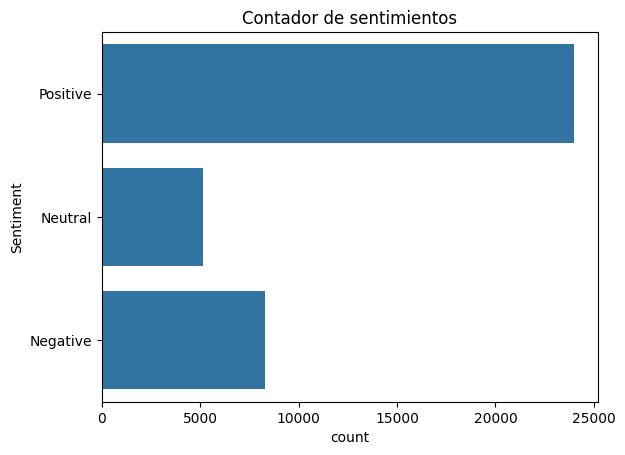

In [ ]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df.Sentiment)
plt.title("Contador de sentimientos")

Muestra del primer comentario para luego comprarlo al eliminarles los caracteres y las stopwords

In [ ]:
df.Translated_Review[0]

'i like eat delicious food. that\'s i\'m cooking food myself, case "10 best foods" helps lot, also "best before (shelf life)"'

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Processed_Review'] = df['Translated_Review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Se puede observar como queda el comentario luego de la limpieza

In [ ]:
df.Processed_Review[0]

'like eat delicious food cooking food case 10 best foods helps lot also best shelf life'

In [ ]:
# Eliminar la columna 'Processed_Review' que no se le realizo la limpieza
df = df.drop(columns=['Translated_Review'])

# Nube de palabras para cada sentimiento


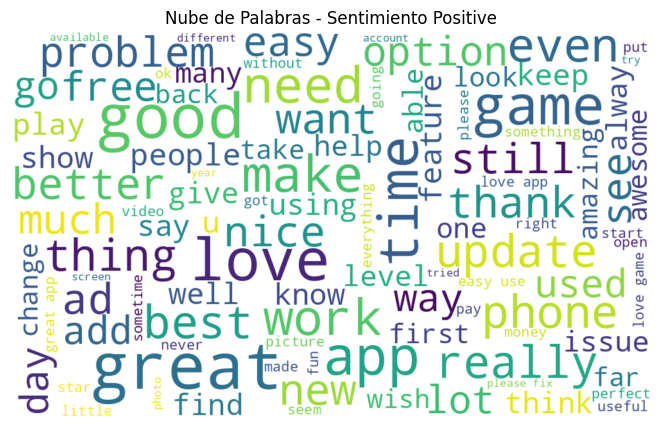

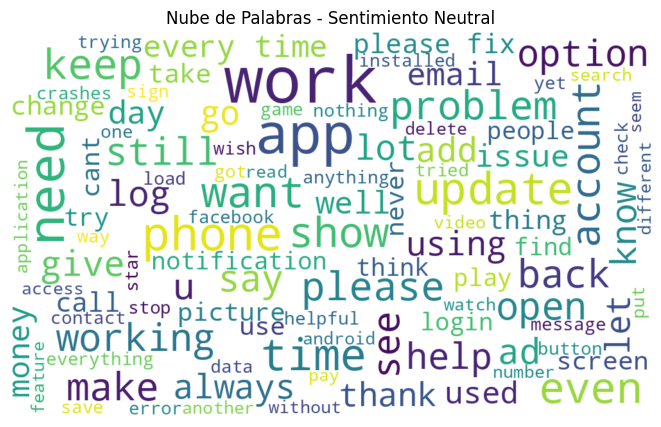

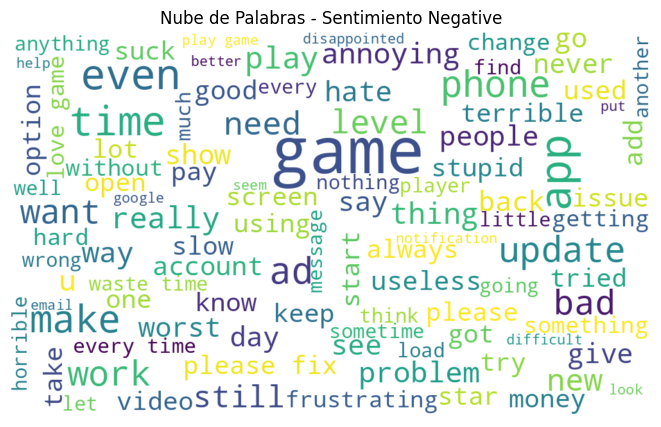

In [ ]:
from wordcloud import WordCloud
# Nube de palabras para cada sentimiento
for sentiment in df['Sentiment'].unique():
    subset = df[df['Sentiment'] == sentiment]
    text = ' '.join(subset['Processed_Review'])
    wordcloud = WordCloud(width=1000, height=600, max_font_size=100, max_words=100, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Nube de Palabras - Sentimiento {sentiment}')
    plt.axis('off')
    plt.show()

# Entrenamiento del Modelo
Vectorización

TfidfVectorizer es una herramienta comúnmente utilizada en el preprocesamiento de texto para convertir una colección de documentos en una matriz de características TF-IDF (Term Frequency-Inverse Document Frequency)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Processed_Review']).toarray()
y = df['Sentiment']


División de Datos:

Se separa el conjunto de entrenamiento y pruebas dejando para pruebas un 20% de los datos

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Entrenamiento del Modelo:
La regresión logística es una elección común para el análisis de sentimientos por varias razones:

* Interpretación directa de probabilidades: La regresión logística calcula la probabilidad de que un ejemplo pertenezca a una clase particular (por ejemplo, sentimiento positivo o negativo). Esto permite interpretar directamente qué tan probable es que un texto tenga un sentimiento específico.

* Eficiencia computacional: Es más ligera computacionalmente en comparación con otros modelos más complejos, lo que la hace rápida de entrenar y aplicar, especialmente en conjuntos de datos de tamaño moderado.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluación del Modelo
Métricas de Rendimiento:

Se genera un modelo con una buena accuracy para la clasificacion

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)


Accuracy: 0.911301095378039
              precision    recall  f1-score   support

    Negative       0.91      0.80      0.85      1653
     Neutral       0.87      0.84      0.85      1049
    Positive       0.92      0.97      0.94      4784

    accuracy                           0.91      7486
   macro avg       0.90      0.87      0.88      7486
weighted avg       0.91      0.91      0.91      7486



Gráficas:

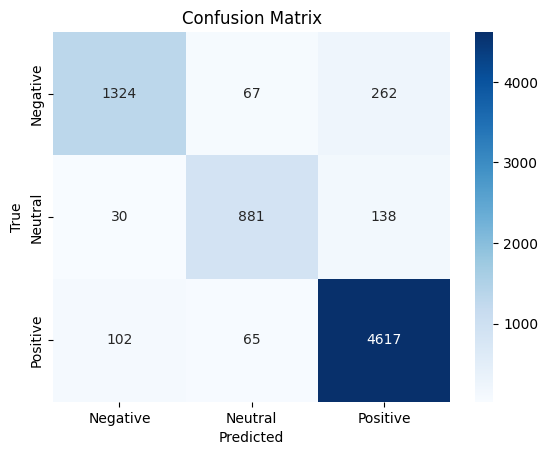

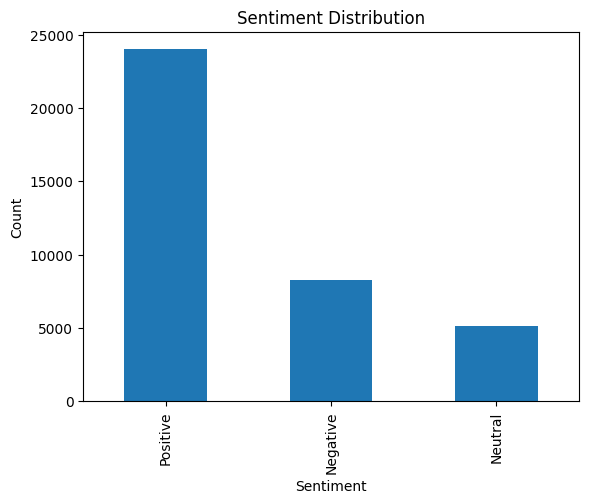

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

df['Sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Haremos lo mismo, pero esta vez aplicando bagging.

# Ensambles y Ajuste de Hiperparámetros


Ajuste de Hiperparámetros con GridSearchCV, el mejor modelo resultante nos aumenta 1% en el accuracy del modelo

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f'Best Model Accuracy: {accuracy_best}')


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Model Accuracy: 0.9250601122094576


El BaggingClassifier es un método de ensamblado que combina múltiples modelos de aprendizaje automático, en este caso clasificadores, para mejorar la precisión y estabilidad de las predicciones y para este caso logra aumentar en 1% el accuracy

In [ ]:
from sklearn.ensemble import BaggingClassifier
model2 = BaggingClassifier(base_estimator=best_model,
                           n_estimators= 200,
                           random_state= 19).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
model2_predict = model2.predict(X_test)
print('El Accuracy usando Bagging con LogisticRegression es de: {}'.format(accuracy_score(model2_predict, y_test)))

El Accuracy usando Bagging con LogisticRegression es de: 0.9314720812182741


A continuación, necesitamos conservar el modelo. El entorno donde implementamos la aplicación a menudo es diferente de donde los entrenamos. La capacitación, por lo general, requiere un conjunto diferente de recursos. Por lo tanto, esta separación ayuda a las organizaciones a optimizar su presupuesto y esfuerzos.

In [ ]:
import joblib
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(model2, 'classifier.pkl')

['classifier.pkl']